In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d kayvanshah/eye-dataset

 99% 99.0M/100M [00:04<00:00, 32.1MB/s]
100% 100M/100M [00:04<00:00, 25.0MB/s] 


In [ ]:
!unzip eye-dataset.zip

In [155]:
train_ds = keras.preprocessing.image.ImageDataGenerator(
                    validation_split=.2
                            ).flow_from_directory(
                                '/content/Eye dataset',
                                subset='training',
                                shuffle=True,
                                target_size=(100,100),
                                batch_size=16
                                                )

Found 11490 images belonging to 4 classes.


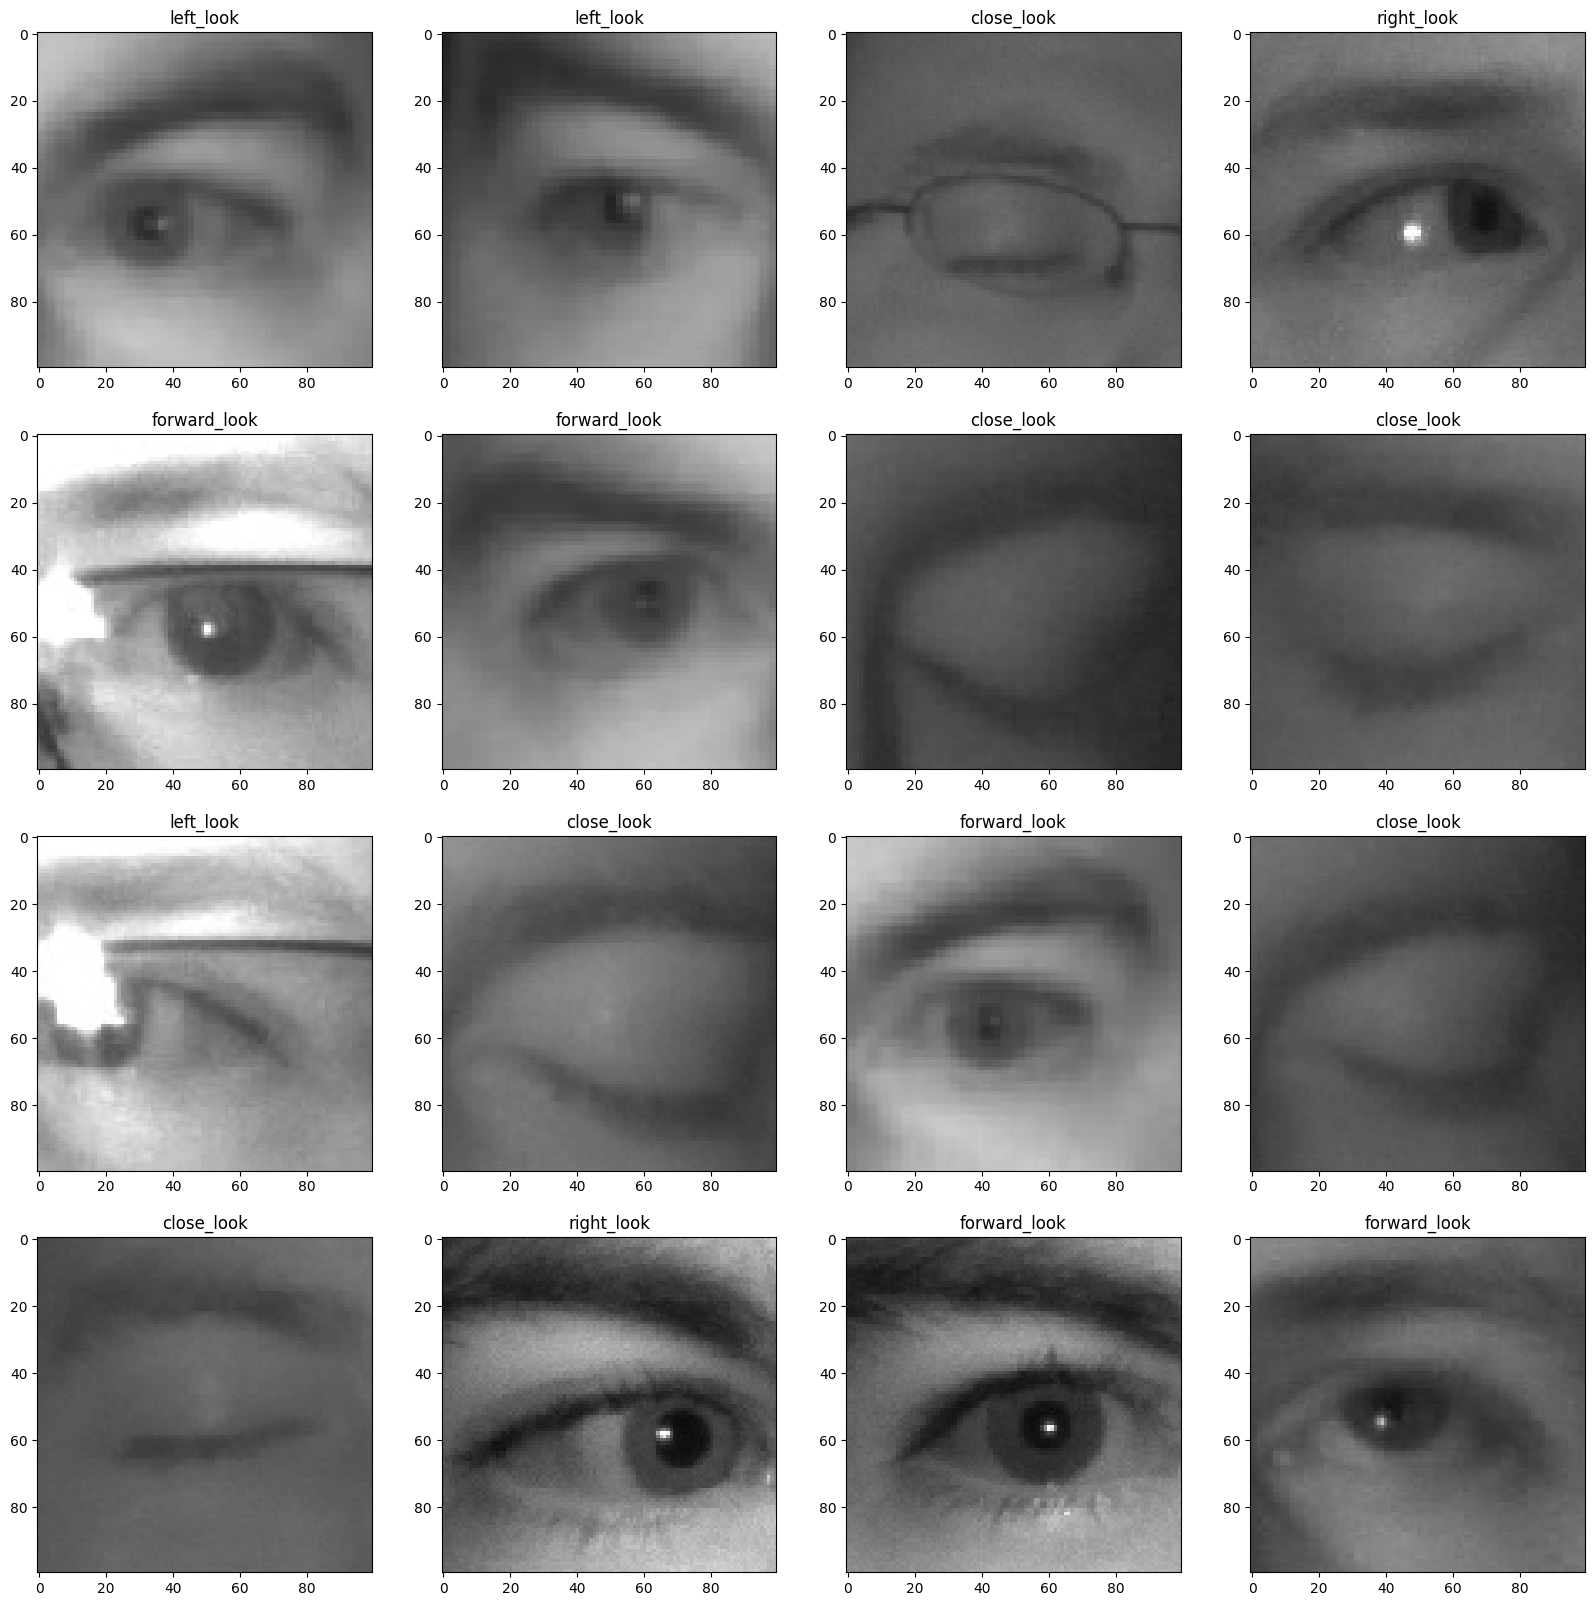

In [217]:
classes=list(train_ds.class_indices.keys())
plt.figure(figsize=(20,20))
for X, y in train_ds:
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X[i]/255.)
        plt.title(classes[np.where(y[i]==1)[0][0]])
    plt.show()
    break

In [156]:
test_ds = keras.preprocessing.image.ImageDataGenerator(
                validation_split=.2
                            ).flow_from_directory(
            '/content/Eye dataset',
            subset='validation',
            shuffle=True,
            target_size=(100,100),
            batch_size=16
                            )

Found 2870 images belonging to 4 classes.


In [157]:
from keras.layers import Conv2D, Dense, BatchNormalization, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

EarlyStop = EarlyStopping(patience=10, restore_best_weights=True)
Reduce_LR = ReduceLROnPlateau(monitor='val_accuracy', verbose=2, factor=0.5, min_lr=0.00001)
model_check = ModelCheckpoint('model.hdf5', monitor='val_loss', verbose=1, save_best_only=True)
callback = [EarlyStop, Reduce_LR, model_check]

In [158]:
model = keras.models.Sequential([
    Conv2D(32, 3, activation='selu', kernel_initializer='lecun_normal', input_shape=(100,100,3)),
    Conv2D(64, 3, activation='selu', kernel_initializer='lecun_normal'),
    BatchNormalization(),
    MaxPooling2D(3),
    Conv2D(128,3, activation='selu', kernel_initializer='lecun_normal'),
    BatchNormalization(),
    MaxPooling2D(3),
    Conv2D(256,3, activation='selu', kernel_initializer='lecun_normal'),
    BatchNormalization(),
    MaxPooling2D(3),
    keras.layers.Flatten(),
    Dense(64, kernel_initializer='lecun_normal', activation='selu'),
    Dense(4, kernel_initializer='glorot_normal', activation='softmax')
])

In [159]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [161]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=50,
    steps_per_epoch=50,
    validation_steps=50,
    callbacks = callback
)

Epoch 1/50
50/50 [==============================] - ETA: 0s - loss: 0.1982 - accuracy: 0.9438
Epoch 1: val_loss improved from inf to 1.01144, saving model to model.hdf5
50/50 [==============================] - 62s 1s/step - loss: 0.1982 - accuracy: 0.9438 - val_loss: 1.0114 - val_accuracy: 0.6513 - lr: 0.0010
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - ETA: 0s - loss: 0.1293 - accuracy: 0.9475
Epoch 2: val_loss improved from 1.01144 to 0.52471, saving model to model.hdf5
50/50 [==============================] - 60s 1s/step - loss: 0.1293 - accuracy: 0.9475 - val_loss: 0.5247 - val_accuracy: 0.8238 - lr: 0.0010
Epoch 3/50
50/50 [==============================] - ETA: 0s - loss: 0.1462 - accuracy: 0.9550
Epoch 3: val_loss did not improve from 0.52471
50/50 [==============================] - 68s 1s/step - loss: 0.1462 - accuracy: 0.9550 - val_loss: 0.9731 - val_accuracy: 0.7287 - lr: 0.0010
Epoch 4/50
50/50 [==============================] - ETA: 0s - loss: 0.1781 - accuracy: 0.9413
Epoch 4: val_loss improved from 0.52471 to 0.32627, saving model to model.hdf5
50/50 [==============================] - 61s 1s/step - loss: 0.1781 - accuracy: 0.9413 - val_loss: 0.3263 - val_accuracy: 0.8900 - lr: 0.0010
Epoch 5/50
50/50 [==============================] - ETA: 0s - loss: 0.1076 - accuracy: 0.9567
Epoc

In [219]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [228]:
epochs = len(loss)

In [229]:
n_epochs = range(0, epochs)

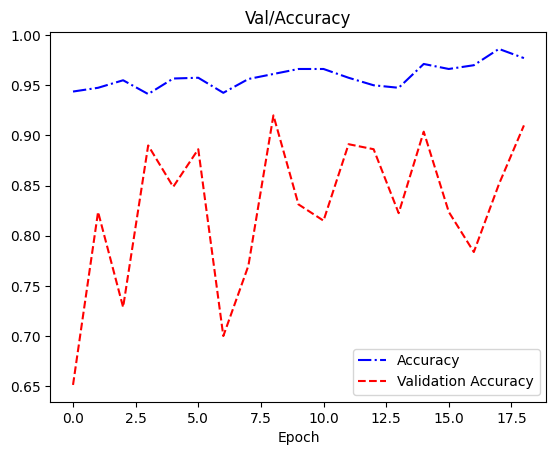

In [231]:
plt.plot(n_epochs, accuracy, 'b-.', label='Accuracy')
plt.plot(n_epochs, val_acc, 'r--', label='Validation Accuracy')
plt.title('Val/Accuracy')
plt.xlabel('Epoch')
plt.legend()

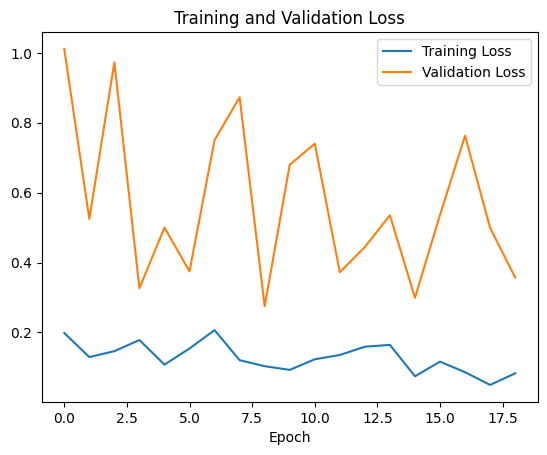

In [235]:
plt.plot(n_epochs, loss, label='Training Loss')
plt.plot(n_epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.legend()